<a href="https://colab.research.google.com/github/LeninGF/CoursesNotes/blob/main/InteligenciaArtificalGenerativa/Problems/LSTM-GRU/EjercicioEmbeddingLSTM-GRU-IAG-2024B_LeninFalconi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Noticias con el Dataset 20 News Groups

Coder: Lenin G. Falconí

Asignatura: Tópicos Especiales (Inteligencia Artificial)

Fecha: 2024-11-11

## Objetivo: 
Clasificar artículos de noticias en varias categorías usando el dataset 20 News Groups. Este 
ejercicio cubre el preprocesamiento, entrenamiento y evaluación de un modelo de 
clasificación de texto. 

## 1. Carga del Dataset

Se usa Kaggle Input para llamar al dataset 20-News Groups Classification

In [1]:
from sklearn.datasets import fetch_20newsgroups
# Download train and test sets
categories = ['alt.atheism', 'sci.space', 'soc.religion.christian']
news_train = fetch_20newsgroups(subset='train', categories=categories)
news_test = fetch_20newsgroups(subset='test', categories=categories)

In [2]:
news_train.target_names

['alt.atheism', 'sci.space', 'soc.religion.christian']

## Preprocesamiento
Transformar los textos en secuencias de índices numéricos y convertir las etiquetas a una 
representación one-hot. 

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_train.data)

# Crear X y Y
X_train = tokenizer.texts_to_sequences(news_train.data)
X_train = pad_sequences(X_train, maxlen=400)
Y_train = to_categorical(news_train.target)

# Tokenize and pad the test set 
X_test = tokenizer.texts_to_sequences(news_test.data) 
X_test = pad_sequences(X_test, maxlen=400)
Y_test = to_categorical(news_test.target)

X_train.shape, Y_train.shape

((1672, 400), (1672, 3))

## Paso 3: Crear el Modelo de Clasificación

In [4]:
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential
num_classes = Y_train.shape[1]
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=120, input_length=X_train.shape[1], input_shape=(X_train.shape[1],)))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 400, 120)       │     1,200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       127,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,327,875 (5.07 MB)

 Trainable params: 1,327,875 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

## Paso 4: Entrenar el Modelo 



In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Train the model with validation split 
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 603ms/step - accuracy: 0.4323 - loss: 1.0632 - val_accuracy: 0.7104 - val_loss: 0.6892
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 25s 603ms/step - accuracy: 0.8504 - loss: 0.4893 - val_accuracy: 0.7403 - val_loss: 0.5454
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 25s 600ms/step - accuracy: 0.9481 - loss: 0.1923 - val_accuracy: 0.8866 - val_loss: 0.3155
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 25s 602ms/step - accuracy: 0.9888 - loss: 0.0583 - val_accuracy: 0.8239 - val_loss: 0.4425
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 25s 593ms/step - accuracy: 0.9671 - loss: 0.1280 - val_accuracy: 0.8836 - val_loss: 0.3188
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 25s 593ms/step - accuracy: 0.9972 - loss: 0.0157 - val_accuracy: 0.8746 - val_loss: 0.3630
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 25s 593ms/step - accuracy: 0.9951 - loss: 0.0202 - val_accuracy: 0.8687 - val_loss: 0.3806
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 25s 594ms/step - accuracy: 0.9967 - loss: 0.0199 - val_accu

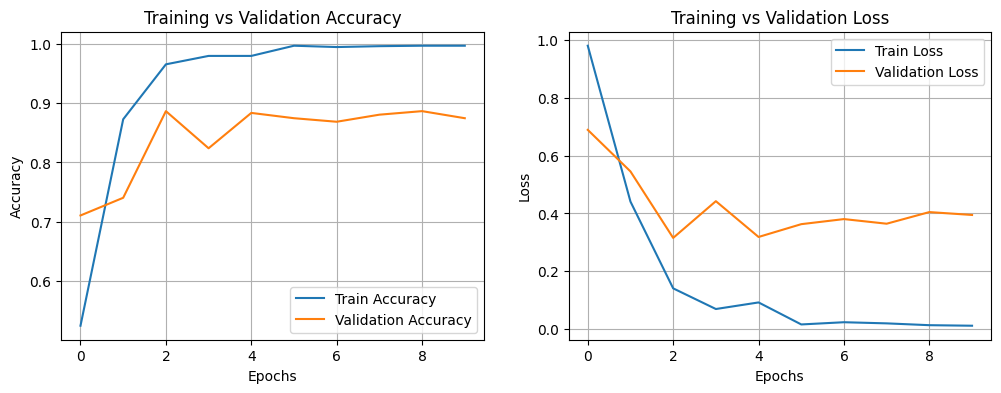

In [7]:
# Plot training vs validation accuracy and loss 
import matplotlib.pylab as plt
plt.figure(figsize=(12, 4)) 
# Plot accuracy 
plt.subplot(1, 2, 1) 
plt.plot(history.history['accuracy'], label='Train Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.title('Training vs Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.grid()
plt.legend() 
# Plot loss 
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Train Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.title('Training vs Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.grid()
plt.show()

## Paso 5 Evaluación

In [8]:
model.evaluate(X_test, Y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.8188 - loss: 0.5033


[0.5187914371490479, 0.8208820819854736]

Se nota que `Y_test` está en One-Hot

In [9]:
Y_test[:5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

Reporte de clasificación

In [10]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(Y_test, axis=1)

target_names = news_test.target_names
target_names

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step


['alt.atheism', 'sci.space', 'soc.religion.christian']

In [11]:
report = classification_report(y_true=y_true,
                               y_pred=y_pred,
                               target_names=target_names)
print(report)

                        precision    recall  f1-score   support

           alt.atheism       0.73      0.76      0.74       319
             sci.space       0.86      0.91      0.88       394
soc.religion.christian       0.87      0.78      0.82       398

              accuracy                           0.82      1111
             macro avg       0.82      0.82      0.82      1111
          weighted avg       0.82      0.82      0.82      1111



## Paso 6. Análisis
Explorar la diferencia entre precisión y recall y cómo estos afectan la clasificación en cada clase.

Calcular la precisión y el recall de las clases seleccionadas usando diferentes umbrales de probabilidad para observar cómo cambian los valores. 

Imprimir los resultados de precisión y recall en un dataframe. 

In [19]:
# Convert class indices to one-hot encoded vectors 
class_indices = np.arange(len(news_test.target_names)) 
one_hot_encodings = to_categorical(class_indices)

# Print the mappings 
for index, label in enumerate(news_test.target_names): 
    print(f"Class: {label} -> One-hot encoding: {one_hot_encodings[index]} -> {np.argmax(one_hot_encodings[index])}")

Class: alt.atheism -> One-hot encoding: [1. 0. 0.] -> 0
Class: sci.space -> One-hot encoding: [0. 1. 0.] -> 1
Class: soc.religion.christian -> One-hot encoding: [0. 0. 1.] -> 2


In [23]:
DEFAULT_CLASS = 1
# umbral 0.5
y_pred_50 = [np.argmax(x) if np.max(x) >= 0.5 else DEFAULT_CLASS for x in predictions ]

# umbral 0.8
y_pred_80 = [np.argmax(x) if np.max(x) >= 0.8 else DEFAULT_CLASS for x in predictions ]

Creando el dataframe

In [24]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score
trade_off = pd.DataFrame({'Precision_50': precision_score(y_true=y_true,
                                                          y_pred=y_pred_50,
                                                          average=None),
                          'Precision_80': precision_score(y_true=y_true,
                                                          y_pred=y_pred_80,
                                                          average=None),
                          'Recall_50': recall_score(y_true=y_true,
                                                    y_pred=y_pred_50,
                                                    average=None),
                          'Recall_80': recall_score(y_true=y_true,
                                                    y_pred=y_pred_80,
                                                    average=None)}, index=news_test.target_names)
trade_off

,Precision_50,Precision_80,Recall_50,Recall_80
alt.atheism,0.741538,0.836502,0.755486,0.689655
sci.space,0.822727,0.686703,0.918782,0.956853
soc.religion.christian,0.881503,0.926421,0.766332,0.695980


### Preguntas
1. ¿Cuál es la diferencia entre precisión y recall en el contexto de este ejercicio? 

Precision y Recall difieren. Precision mide la proporcion de elementos que sí pertenecen a la clase que el modelo predice. En cambio recall busca determinar la proporción de elementos correctamente clasificados. 

2. ¿Cuál métrica es más importante en este caso si el objetivo es identificar la mayoría de los artículos en la categoría alt.atheism? Justificar la respuesta.

Recall es más importante en este caso si el objetivo es identificar la mayoría de los artículos en la categoría alt.atheism.Esto se debe a que el recall mide la capacidad del modelo para identificar correctamente todos los artículos que realmente pertenecen a la categoría alt.atheism.Un alto recall significa que menos artículos verdaderamente pertenecientes a alt.atheismserán perdidos o clasificados incorrectamente en otras categorías.

3. Observar los resultados a diferentes umbrales. ¿Cómo afecta el cambio de umbral en la capacidad del modelo para clasificar cada clase? 

Se observa una mejora en cuanto a la predicción ya que la clase con menor número de elementos mejora su precisión

4. Si la precisión de la clase sci.space es alta, ¿qué significa esto sobre el modelo? 
    A. Predice bien los artículos de sci.space cuando clasifica esa clase. [X]
    B. Puede identificar correctamente todos los artículos de sci.space. 

5. Si el recall de alt.atheism es bajo, ¿qué implicaciones tiene esto para la clasificación de los artículos? 
    A. El modelo está identificando la mayoría de los artículos de alt.atheism. 
    B. Es probable que muchos artículos de alt.atheism se clasifiquen incorrectamente en otras categorías. [X]
